<a href="https://colab.research.google.com/github/YuvrajZende/Machine-Learning-Practice/blob/main/ML3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

In [9]:
df = pd.read_csv("/content/pacific.csv")
print(df.head())

         ID                 Name  ...  High Wind SW  High Wind NW
0  EP011949              UNNAMED  ...          -999          -999
1  EP011949              UNNAMED  ...          -999          -999
2  EP011949              UNNAMED  ...          -999          -999
3  EP011949              UNNAMED  ...          -999          -999
4  EP011949              UNNAMED  ...          -999          -999

[5 rows x 22 columns]


In [10]:
data_structure = pd.Categorical(df.Status)
df['Status'] = data_structure.codes

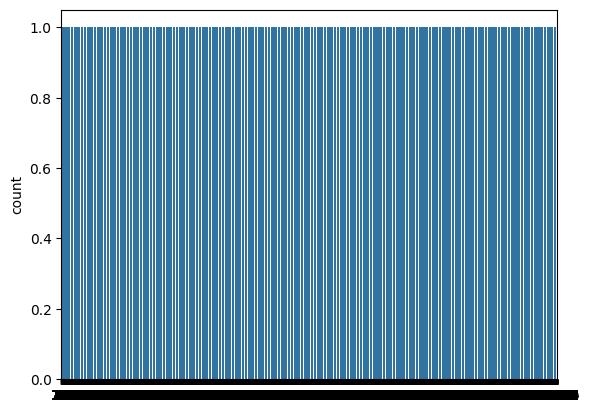

In [13]:
def convert_latitude(lat_str):
  if isinstance(lat_str, str):
    if 'N' in lat_str:
      return float(lat_str.replace('N', ''))
    elif 'S' in lat_str:
      return float(lat_str.replace('S', '-'))
  return float(lat_str)

def convert_longitude(lon_str):
  if isinstance(lon_str, str):
    if 'E' in lon_str:
      return float(lon_str.replace('E', ''))
    elif 'W' in lon_str:
      return float(lon_str.replace('W', ''))
  return float(lon_str)

df['Latitude'] = df['Latitude'].apply(convert_latitude)
df['Longitude'] = df['Longitude'].apply(convert_longitude)
sns.countplot(df['Status'],label='Count')
plt.show()

In [17]:
#print(df.columns)
pred_columns = df[:]
pred_columns.drop(['Status', 'Event', 'ID', 'Name', 'Latitude', 'Longitude'], axis=1, inplace=True)
prediction_var = pred_columns.columns
print(prediction_var)

Index(['Date', 'Time', 'Maximum Wind', 'Minimum Pressure', 'Low Wind NE',
       'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE',
       'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW',
       'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW'],
      dtype='object')


/tmp/ipython-input-1235514545.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_columns.drop(['Status', 'Event', 'ID', 'Name', 'Latitude', 'Longitude'], axis=1, inplace=True)


In [18]:
train,test = train_test_split(df,test_size=0.3)
print(train.shape)
print(test.shape)

(18295, 22)
(7842, 22)


In [19]:
train_x = train[prediction_var]
train_y = train['Status']
test_x = test[prediction_var]
test_y = test['Status']


In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
model = GaussianNB()

"""
we have 3 types of Bayes
 1] GaussianNB -> continous data
 2] MultinomialNB -> text classification
 3] BernoulliNB
"""

model.fit(train_x,train_y)
pred = model.predict(test_x)

accuracy_score(test_y,pred)

confusion_matrix(test_y,pred)
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.07      1.00      0.13        68
           1       0.01      0.96      0.02        45
           2       0.00      0.00      0.00        34
           3       1.00      0.39      0.56      2034
           5       0.01      0.02      0.02       560
           6       0.50      0.33      0.40         3
           7       0.00      0.00      0.00         1
           8       0.20      1.00      0.33         1
           9       0.11      1.00      0.20         1
          10       0.64      0.31      0.42      2137
          11       1.00      0.15      0.26      2958

    accuracy                           0.26      7842
   macro avg       0.32      0.47      0.21      7842
weighted avg       0.81      0.26      0.36      7842



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
cnf_matrix = metrics.confusion_matrix(test_y, pred)
print(cnf_matrix)

[[  68    0    0    0    0    0    0    0    0    0    0]
 [   0   43    0    0    0    0    0    0    0    1    1]
 [   2   18    0    0    3    0    0    0    0   11    0]
 [   0 1094    0  787  145    0    0    0    8    0    0]
 [ 516    6    0    0   10    0    0    0    0   28    0]
 [   0    0    0    0    0    1    0    2    0    0    0]
 [   0    0    0    0    0    1    0    0    0    0    0]
 [   0    0    0    0    0    0    0    1    0    0    0]
 [   0    0    0    0    0    0    0    0    1    0    0]
 [ 359 1106    0    0    0    0    1    0    0  671    0]
 [  34 1589    0    0  555    0    3    2    0  335  440]]


In [25]:
print(df.shape[0],(test_y != pred).sum())

26137 5820


In [23]:
correct = (test_y == pred).sum()
print(correct)
total = len(df)
accuracy = (total-correct)/total
print(f"tot = {accuracy*100:.2f}%")

2022
tot = 92.26%
